# **LINEAR REGRESSION**

Simple Linear Regression aims to describe how one variable i.e the dependent variable changes in relation with reference to the independent variable. For example consider a scenario where a company wants to predict sales based on advertising expenditure. By using simple linear regression the company can determine if an increase in advertising leads to higher sales or not.

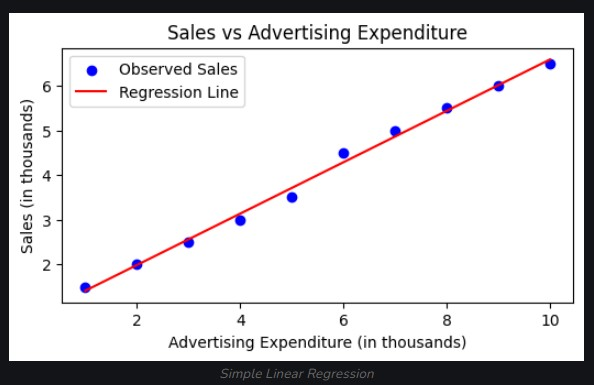

The relationship between the dependent and independent variables is represented by the simple linear equation:

y=mx+b

Here:

y is the predicted value (dependent variable).
m is the slope of the line
x is the independent variable.
b is the y-intercept (the value of y when x is 0).

# **CODE FOR LINEAR REGRESSION**

Step 1: Import Required Libraries

Step 2: Load and Explore the Dataset

We will load the dataset check its structure and examine a few sample records.

In this dataset:

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
RM: average number of rooms per dwelling

PRICE: median value of owner-occupied homes in $1000s (this is our target variable)

Step 3: Selecting Features and Splitting the Data

We will use the number of rooms (RM) as the independent variable and predict house prices (PRICE). Next, we'll split the data into training and testing sets

Step 4: Train the Simple Linear Regression Model

Now we can create a Linear Regression model using scikit-learn and train it on the training data. The model will calculate the intercept (𝛽0) and coefficient (𝛽1) of the linear equation.

Step 5: Make Predictions

Once the model is trained, we can use it to make predictions on the test data.

Step 6: Visualize the Regression Line

A good way to understand the relationship between the predicted and actual data is to visualize it. We'll plot the regression line along with the actual data points.

Step 7: Evaluate the Model

Finally, we will evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared score.

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64
Training set size: 16512
Testing set size: 4128
Intercept: 1.6547622685968417
Coefficient: [0.07675559]
        Actual  Predicted
20046  0.47700   1.976537
3024   0.45800   2.041563
15663  5.00001   1.960031
20484  2.18600   2.127856
9814   2.78000   2.0

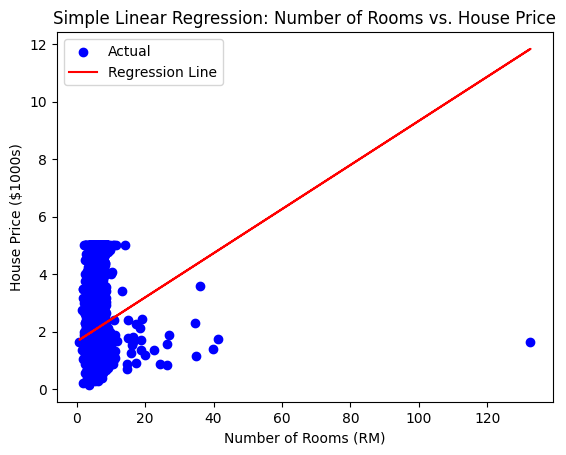

Mean Squared Error: 1.2923314440807299
R-squared score: 0.013795337532284901


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target variable (house prices) to the DataFrame
df['PRICE'] = housing.target

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Define the feature (independent variable) and target (dependent variable)
X = df[['AveRooms']]  # Number of rooms
y = df['PRICE']  # House prices

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the intercept and coefficient
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

# Predict house prices for the test set
y_pred = model.predict(X_test)

# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('House Price ($1000s)')
plt.title('Simple Linear Regression: Number of Rooms vs. House Price')
plt.legend()
plt.show()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

# FULL CODE EXPLANATION

import numpy as np

Imports NumPy (numerical arrays & utilities) under the alias np. Useful for numeric operations and reshaping arrays.

import pandas as pd

Imports pandas as pd. Used for reading/manipulating tabular data (DataFrame / Series).

import matplotlib.pyplot as plt

Imports Matplotlib’s plotting interface as plt. You use plt to create scatter/line plots, labels, legends, etc.

from sklearn.model_selection import train_test_split

Imports the function to split data into training and testing subsets.

from sklearn.linear_model import LinearRegression

Imports scikit-learn’s ordinary least squares linear regression estimator.

from sklearn.metrics import mean_squared_error, r2_score

Imports two evaluation metrics: Mean Squared Error (MSE) and R² (coefficient of determination).

from sklearn.datasets import fetch_california_housing

Imports a helper to load the California housing dataset (a built-in dataset in scikit-learn).

housing = fetch_california_housing()

Downloads/loads the dataset and returns a Bunch object (similar to a dict) containing data, target, feature_names, and DESCR (dataset description).

df = pd.DataFrame(housing.data, columns=housing.feature_names)

Creates a pandas DataFrame from the dataset’s feature matrix and names the columns using feature_names. Each row corresponds to one district/sample.

df['PRICE'] = housing.target

Adds the target values (median house price for each district) into the DataFrame as a new column named 'PRICE'.

print(df.head())

Prints the first 5 rows of df so you can quickly inspect features and the newly added PRICE column.

print(df.isnull().sum())

Checks for missing values column by column and prints counts (useful sanity check — returns zeroes if there are no NaNs).

X = df[['AveRooms']] # Number of rooms

Selects the AveRooms column as the feature (predictor). Note the double brackets [['AveRooms']] — this returns a DataFrame with shape (n_samples, 1), which is a safe format for scikit-learn.

y = df['PRICE'] # House prices

Selects the target PRICE as a pandas Series of length n_samples.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Randomly splits X and y into training and test sets. test_size=0.2 → 20% test, 80% train. random_state=42 ensures the split is reproducible (same split every run).

print(f"Training set size: {X_train.shape[0]}")

Prints the number of training samples (rows). shape[0] is the row count.

print(f"Testing set size: {X_test.shape[0]}")

Prints the number of test samples.

model = LinearRegression()

Instantiates the linear regression model with default settings (e.g., fit_intercept=True).

model.fit(X_train, y_train)

Fits (trains) the linear model on the training data. Internally it computes the slope (coef) and intercept that minimize the least squares error.

print(f"Intercept: {model.intercept_}")

Prints the learned intercept b. The regression equation is: prediction = intercept + coef * AveRooms.

print(f"Coefficient: {model.coef_}")

Prints the learned coefficient(s). For a single feature this is an array of length 1 (e.g. array([0.3])). You can access the scalar with model.coef_[0].

y_pred = model.predict(X_test)

Uses the trained model to predict house prices for the test set X_test. y_pred is a NumPy array of predicted values for the test rows.

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

Builds a DataFrame with two columns: the actual target values (y_test, a Series) and predicted values (y_pred, an array). This is handy for side-by-side comparison. Because y_test is a Series with the test index, the resulting DataFrame will align on that index.

print(predictions.head())

Prints the first few rows of the comparison table (actual vs predicted).

plt.scatter(X_test, y_test, color='blue', label='Actual')

Draws a scatter plot of the test data points: AveRooms (x) vs actual PRICE (y). Points are colored blue and labeled 'Actual'.

plt.plot(X_test, y_pred, color='red', label='Regression Line')

Plots predicted values as a connected red line. Important plotting note: plt.plot connects points in the order provided. If X_test is not sorted, the line may look zig-zaggy. For a smooth regression line you should either sort X_test and corresponding y_pred or compute predictions on a sorted grid (see improvements below).

plt.xlabel('Number of Rooms (RM)')

Sets the x-axis label.

plt.ylabel('House Price ($1000s)')

Sets the y-axis label. (Be careful — the exact unit depends on the dataset; check housing.DESCR to confirm the unit/scaling.)

plt.title('Simple Linear Regression: Number of Rooms vs. House Price')

Adds a plot title.

plt.legend()

Shows the legend for labeled plot elements (Actual and Regression Line).

plt.show()

Renders the plot (in a Jupyter notebook it displays inline; in a script it opens a window).

mse = mean_squared_error(y_test, y_pred)

Computes Mean Squared Error (MSE) between actual and predicted test values. MSE = average of squared differences; lower is better.

print(f"Mean Squared Error: {mse}")

Prints the MSE numeric value.

r2 = r2_score(y_test, y_pred)

Computes the coefficient of determination R². R² ranges (theoretically) from
−
∞
−∞ to 1; values closer to 1 mean a better fit (more variance in y explained by the model).

print(f"R-squared score: {r2}")

Prints the R² score.